In [294]:
import numpy as np
import pandas as pd
import pickle
import ast

import modules_cleaned

# Packages for plotting
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

### CRITICAL DENSITY PLOT

/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_53633/506647703.py:42: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


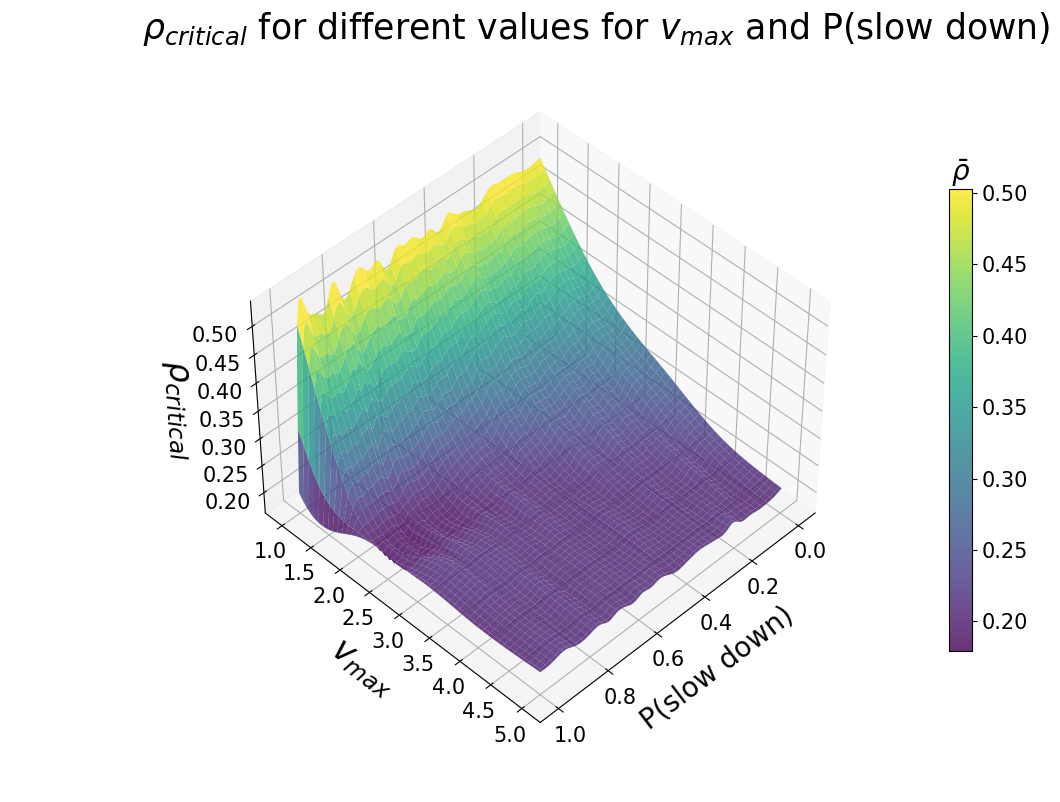

In [295]:
filepath = 'Results/critical_densities_nasch_n=10_L=200_T=100_#p=30_reps=10.csv'
df = pd.read_csv(filepath)

# Load in values
x_values = df['p_slowdown'].values
y_values = df['v_max'].values
z_values = [np.mean(ast.literal_eval(string)) for string in df['critical_density'].values]


# Create grid to later put Z values on
xi, yi = np.linspace(min(x_values), max(x_values), 100), np.linspace(min(y_values), max(y_values), 100)

# Put actual datapoints on grid
X, Y = np.meshgrid(xi, yi)

# Put z_value data on the grid and interpolate 
Z = griddata((x_values, y_values), z_values, (X, Y), method='cubic')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Set labels, title and ticks
ax.set_xlabel(r'P(slow down)', labelpad=15, fontsize=20)
ax.set_ylabel(r'$v_{max}$', labelpad=15, fontsize=24)
ax.set_zlabel(r'$\rho_{critical}$', labelpad=18, fontsize=24)

ax.tick_params(axis='x', which='both', labelsize=15)
ax.tick_params(axis='y', which='both', labelsize=15)
ax.tick_params(axis='z', which='both', labelsize=15, pad=10)

plt.title(r'            $\rho_{critical}$ for different values for $v_{max}$ and P(slow down)', fontsize=25)

# Add colorbar
bar = fig.colorbar(surf, ax=ax, shrink=0.5)
bar.ax.set_title(r'$\bar{\rho}$', fontsize=20)
bar.ax.tick_params(axis='y', which='both', labelsize=15)


# Set view
ax.view_init(elev=45, azim=45) 
ax.dist = 12
plt.savefig('Plots_presentation/critical_density_3D.png')

### MOVEMENT TOWARDS CRTIICAL DENSITY

In [ ]:
L = 300
n = 10
v_max = 5
p_slowdown = 0.3
neighbourhood_size = 10
entry_chance = 0.1
exit_chance = 0.1
dynamic_model=True

densities_dynamic = []
for p_idx, p in enumerate(np.linspace(0.3, 0.9, 120)):
    density_dynamic = modules_cleaned.find_density(L, p, n, v_max, p_slowdown, dynamic_model, neighbourhood_size, entry_chance, exit_chance)
    densities_dynamic.append(density_dynamic)

file = open('Results/densities_dynamic.txt', 'wb')
pickle.dump(densities_dynamic, file)
file.close()

In [ ]:
file = open('Results/densities_dynamic.txt', 'rb')
densities_dynamic = pickle.load(file)

plt.figure(figsize=(10,12))

for density in densities_dynamic:
    plt.plot(density, '#356058', alpha=0.3)


plt.plot([-100, 300], [np.mean(densities_dynamic), np.mean(densities_dynamic)], color='darkorange', linewidth=4)
plt.xlim(0,30)
plt.ylim(0.3,0.9)
plt.grid(alpha=0.4)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.yticks([0.3, 0.9, np.mean(densities_dynamic)], [r'$0.3$', r'$0.9$', r'$\bar{\rho}$'], fontsize=20)
plt.xticks(fontsize=20)
plt.title(r'Evolution of $\rho$ of cars over time', fontsize=30)

### DENSITY VERSUS EXIT AND ENTRY CHANCE

In [ ]:
L = 300
n = 10
v_max = 5
p_slowdown = 0.3
neighbourhood_size = 10
entry_chance = 0.1
dynamic_model=True

final_density_dict = {}

for ratio_idx, ratio in enumerate(np.linspace(0.1, 4, 40)):
    final_density_column = []  # List to store values for the current ratio
    for p_idx, p in enumerate(np.linspace(0.3, 0.9, 30)):
        exit_chance = ratio * entry_chance
        densities = modules_cleaned.find_density(L, p, n, v_max, p_slowdown, dynamic_model, neighbourhood_size, entry_chance, exit_chance)
        density_mean = np.mean(densities[L:])
        final_density_column.append(density_mean)

    # Store the entire list of values for the current ratio
    final_density_dict[ratio] = final_density_column

file = open('Results/final_density_dict.txt', 'wb')
pickle.dump(final_density_dict, file)
file.close()


In [ ]:
file = open('Results/final_density_dict.txt', 'rb')
final_density_dict = pickle.load(file)

ratios = np.linspace(0.1, 4, 40)

means = [np.mean(final_density_dict[ratio]) for ratio in ratios]
std_devs = [np.std(final_density_dict[ratio]) for ratio in ratios]

plt.figure(figsize=(10,12))

plt.plot(ratios, means, label='Final Density', color='#356058')
plt.fill_between(ratios, np.subtract(means, std_devs), np.add(means, std_devs), alpha=0.4, color='#356058')

plt.xlim(0.1,4)
plt.ylim(0.2,0.9)
plt.grid(alpha=0.4)
plt.xlabel(r'$\frac{P(exit)}{P(entry)}$', fontsize=30)
plt.ylabel(r'$\bar{\rho}$', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title(r'$\bar{\rho}$ for different ratios of $P(exit)$ and $P(entry)$', fontsize=25)

plt.show()